# Midterm exam
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This take-home exam contains two questions. _Your answers should be turned in to the instructor and the course assistant no later than 1:30pm on November 12th, and you are not allowed to discuss the exam with anyone until then._ The only exception is when you email the instructor for clarification.

Your answers should be as concise as possible while self-explaining that the presented results are reasonable. **_Poorly presented answers or list of graphs without any explanation, for which the graders have to closely examine or even run the code to check the correctness, will get no credit._** We suggest you spend at least an hour in carefully writing down concise explanations on your results.

Write your student ID and name below. **_Typing your name implies that you acknowledge and accept the Kyung Hee University Honor Code._**

<br>

- STUDENT ID: 

- STUDENT NAME: 

<br>

_Kyung Hee University Honor Code:_

1. The honor code is a commitment of students, individually and collectively, that they will not provide or receive any impermissible aid in examinations as well as other activities used as the basis of grading, and that they will do their best for the sake of the integrity of the community.
2. The faculty also assumes obligations to provide students with the environment in which students can best practice the honor code, and does its part in building the academic integrity of the community.

<br>

---
## Length of a parametric curve

The following parametric equations describe some flower-shaped curve in the complex plane, where $r$ and $\theta$ is the magnitude and the phase of the complex number at time $t$. 

\begin{align*}
  r(\theta) &= 1 + \cos 5\theta
\end{align*}



<br>

_**(Problem 1a)**_ Draw the trajectory of the complex variables described by the above parametrization on the complex plane, for $0 \le \theta \lt 2\pi$.

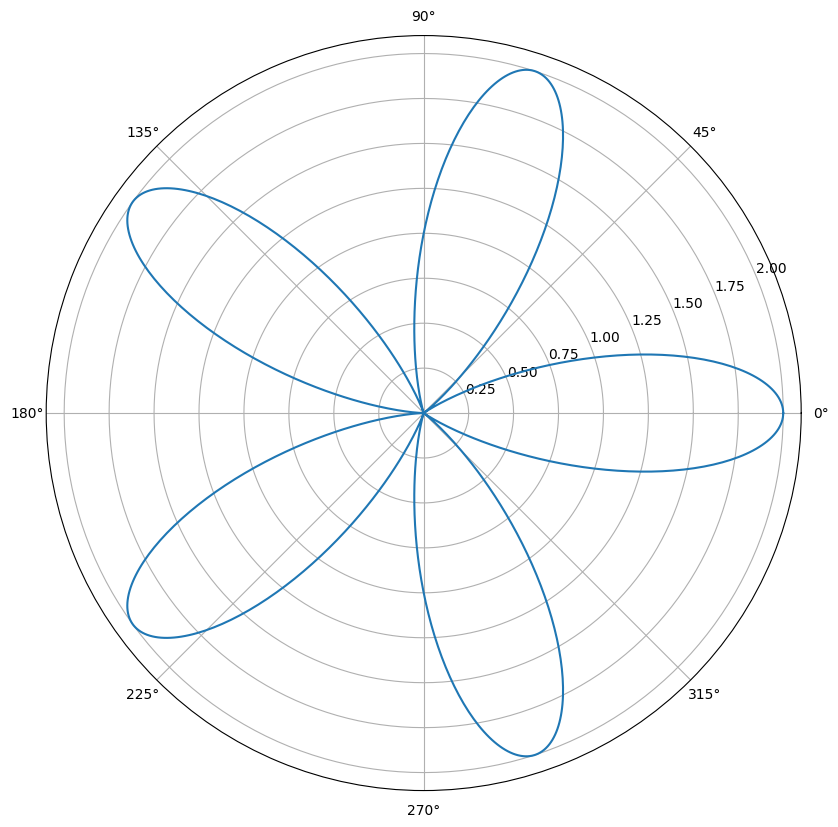

In [44]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0,2*np.pi,1000) #0에서 2pi까지 theta 설정.

fig = plt.figure(figsize = (10,10), dpi =100)
ax = fig.add_subplot(111, projection='polar') #극좌표로 projection
#plt.subplot(111, projection='polar',figsize = (10,10),dpi=100)
ax.plot(theta, np.cos(5*theta)+1)
plt.show() #출력


<br>

_**(Problem 1b)**_ An infinitesimal arc length along the curve is given by:

$$
  dl = \sqrt{dr^2 + (rd\theta)^2}
$$

What is the total arc length, $L = \int {dl}$, obtained for $0 \le \theta \lt 2\pi$?

<br>

$$
  dl = \sqrt{dr^2 + (rd\theta)^2}
$$
의 양변을 $$d\theta$$로 나누고 곱해주면 L = $\int {\sqrt{r^2+(dr^2/d\theta^2)}  d\theta}$가 됨을 이용한다.



In [45]:
import numpy as np
from scipy.integrate import quad #적분위해 quad 불러옴.

theta = np.linspace(0,2*np.pi,1000) #0에서 2pi까지 theta 설정.

ftheta = lambda theta: 2+2*np.cos(theta)+24*(np.sin(theta)**2) #r^2 + dr^2/dtheta^2 를 정리한 결과
print(quad(ftheta,0,2*np.pi)) 


(87.96459430051421, 5.579292182765573e-08)


<br>

---
## Near-Earth Objects

A near-Earth object (NEO) is any small Solar System body whose orbit brings it to proximity with Earth. By convention, a Solar System body is an NEO if its closest approach to the Sun (perihelion) is less than 1.3 astronomical units (AU). If an NEO's orbit crosses the Earth's, and the object is larger than 140 meters (460 ft) across, it is considered a potentially hazardous object (PHO). Most known PHOs and NEOs are asteroids, but a small fraction are comets.

Positions of NEOs can be described by the following differential equations in polar coordinates:

<br>

<center>
<img src="https://jonghank.github.io/ee370/files/polar_coord.png">
</center>

<br>

\begin{equation}
  \ddot{r} - r {\dot\theta}^2 = - \frac{\mu}{r^2}\\
  r \ddot{\theta} + 2 \dot{r}\dot{\theta} = 0
\end{equation}

<br>

where the range $r$ is the distance from the Sun, and the angle $\theta$ is measured from a reference line fixed in space, for example the direction to the Galactic center. We assume that the Sun is fixed in space and the motion of the NEOs are confined to a single orbital plane in which $r$ and $\theta$ are defined (and on which all planets in the solar system orbit). 

<br>

<center>
<img src="https://jonghank.github.io/ee370/files/orbital_plane.jpg" width="800"
title="Image from National Geographic (https://media.nationalgeographic.org/assets/photos/000/285/28546.jpg)">
</center>

<br>

The normalized _gravitational coefficient_, $\mu$, appearing in the above dynamics is given as `mu` from below cell. The corresponding unit of $r$ is _AU_, which is roughly the distance from Earth to the Sun and equal to about 150 million kilometers, and the unit of the time is _day_. The unit of $\theta$ is _radian_ as usual.  

In [46]:
AU = 1.495978707e11           # AU in meters
DAY = 24*3600                 # day in seconds
GM_sun = 1.32712440018e20     # gravitational coefficient in m^3/s^2 
mu = GM_sun*DAY**2/AU**3      # gravitational coefficient in AU^3/DAY^2

The following cell loads the current (November 10th, 2020) positions and the velocities, _i.e., $r$, $\dot{r}$, $\theta$, and $\dot\theta$_, of the 1000 NEOs in polar coordinates to the dataframe `NEO_current_states`. We are interested in finding the objects with the highest potential threat, among these 1000 NEOs. We assume that all these NEOs are similar in sizes, so what determines the level of threat is its closest approach to Earth.


In [47]:
import pandas as pd
NEO_current_states = pd.read_csv('https://jonghank.github.io/ee370/files/NEO_trajectories_data.csv', delimiter=',')
print(NEO_current_states)

     Range (AU)  Range rate (AU/day)  Angle (rad)  Angular rate (rad/day)
0      2.133308             0.003665     0.977053               -0.004586
1      1.908573             0.008889     1.160662                0.005912
2      2.113991             0.000057     2.656841                0.004874
3      1.781492             0.003859     2.450110               -0.004909
4      2.529540            -0.000231     1.692584               -0.003673
..          ...                  ...          ...                     ...
995    3.602814             0.000584     5.054014               -0.001917
996    2.591211             0.000574     1.929045               -0.003500
997    5.731768             0.001891     2.018961                0.000807
998    3.361846            -0.005061     3.355979               -0.002215
999    1.006094            -0.005929     4.597362               -0.015454

[1000 rows x 4 columns]


In addition, we assume that the current position and the velocity of the Earth (on November 10th, 2020) is as follows:

- $r_\text{E} = 1 $
- $\dot{r}_\text{E} = 0$
- $\theta_\text{E} = 0 $
- $\dot\theta_\text{E} = \sqrt{\mu} $

so the reference line, where $\theta=0$, is the direction (from the Sun) to which the Earth is located today. 


<br>

_**(Problem 2a)**_ Plot the trajectories of the first 10 NEOs (in the database) and the Earth (and the Sun), simultaneously displaying (the pieces of) their elliptic orbits on a single plot. Present the three separate plots showing the trajectories (1) for the next year, (2) for the next 2 years, and (3) for the next 5 years.

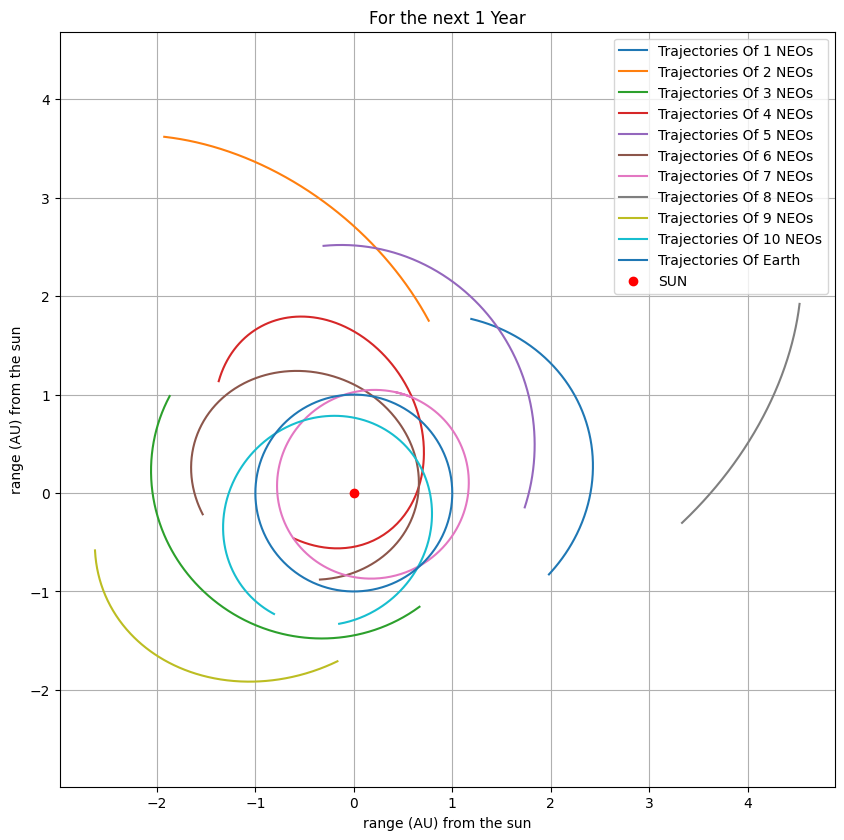

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi

AU = 1.495978707e11           # AU in meters
DAY = 24*3600                 # day in seconds
GM_sun = 1.32712440018e20     # gravitational coefficient in m^3/s^2 
mu = GM_sun*DAY**2/AU**3      # gravitational coefficient in AU^3/DAY^2

NEO_current_states = pd.read_csv('https://jonghank.github.io/ee370/files/NEO_trajectories_data.csv', delimiter=',')

def model(z,t):  #적분 변수를 위해.                   
  r, v, th ,w = z                  #인수는 변하는 값만

  rdot = v                          # v= r'
  vdot = r*(w**2) - mu/(r**2)       # 주어진 식 정리

  thdot = w                         # w = theta'
  wdot = -2*v*w/r                   # 주어진 식 정리
  
  return np.array([rdot, vdot,thdot,wdot]) #미분 결과 반환


t = np.arange(0,365) #n년(일)

for i in range(10): #열 개의 천체
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic

  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분

  plt.figure(num=1,figsize=(10,10), dpi=100)
  plt.plot(state[:,0]*np.cos(state[:,2]) , state[:,0]*np.sin(state[:,2]), label=f'Trajectories Of {i+1} NEOs') #x = rcos(theta), y =rsin(theta)

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 
plt.figure(num=1,figsize=(10,10), dpi=100)
plt.plot(state_e[:,0]*np.cos(state_e[:,2]) , state_e[:,0]*np.sin(state_e[:,2]), label=f'Trajectories Of Earth')

plt.figure(num=1, figsize=(10,10), dpi=100) #한꺼번에 묶기
plt.plot(0,'ro', label = "SUN") #중심부에 태양 표시
plt.xlabel(r'range (AU) from the sun')
plt.ylabel(r'range (AU) from the sun')
plt.axis('equal')
plt.title("For the next 1 Year")
plt.legend()
plt.grid()








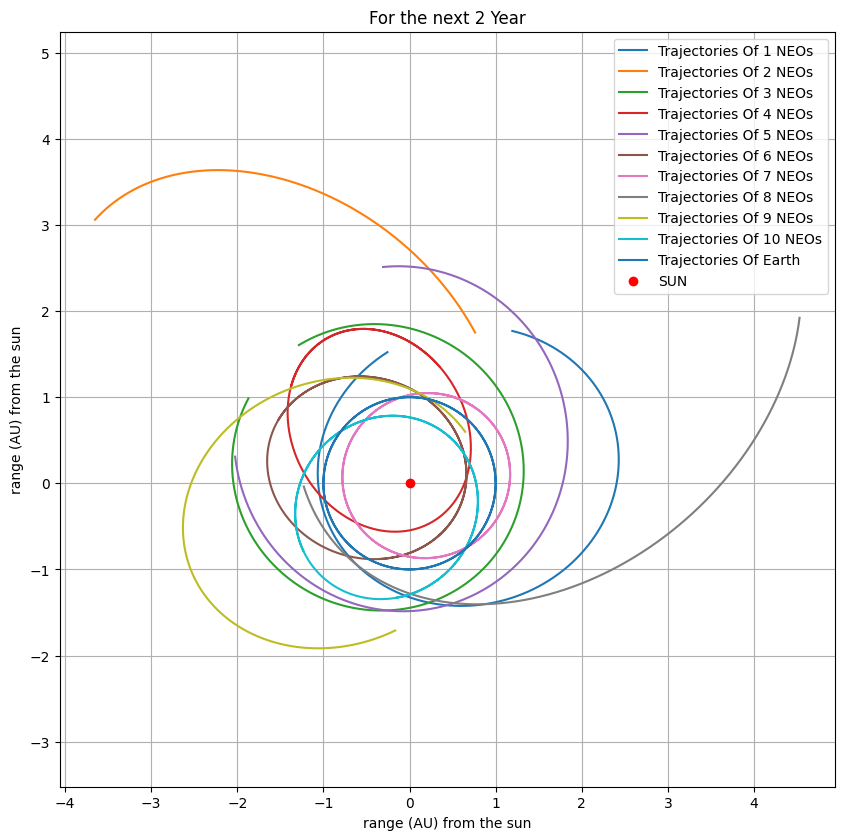

In [51]:
t = np.arange(0,365*2) #n년(일)

for i in range(10): #열 개의 천체
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic

  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분

  plt.figure(num=1,figsize=(10,10), dpi=100)
  plt.plot(state[:,0]*np.cos(state[:,2]) , state[:,0]*np.sin(state[:,2]), label=f'Trajectories Of {i+1} NEOs') #x = rcos(theta), y =rsin(theta)

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 
plt.figure(num=1,figsize=(10,10), dpi=100)
plt.plot(state_e[:,0]*np.cos(state_e[:,2]) , state_e[:,0]*np.sin(state_e[:,2]), label=f'Trajectories Of Earth')

plt.figure(num=1, figsize=(10,10), dpi=100) #한꺼번에 묶기
plt.plot(0,'ro', label = "SUN") #중심부에 태양 표시
plt.xlabel(r'range (AU) from the sun')
plt.ylabel(r'range (AU) from the sun')
plt.axis('equal')
plt.title("For the next 2 Year")
plt.legend()
plt.grid()

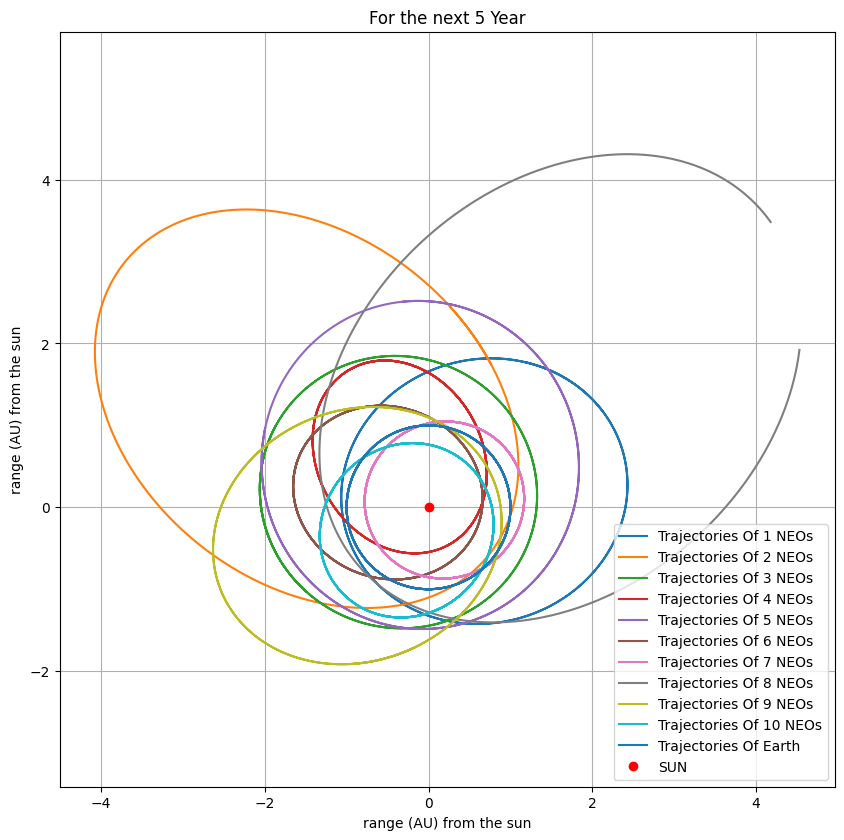

In [52]:
t = np.arange(0,365*5) #n년(일)

for i in range(10): #열 개의 천체
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic

  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분

  plt.figure(num=1,figsize=(10,10), dpi=100)
  plt.plot(state[:,0]*np.cos(state[:,2]) , state[:,0]*np.sin(state[:,2]), label=f'Trajectories Of {i+1} NEOs') #x = rcos(theta), y =rsin(theta)

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 
plt.figure(num=1,figsize=(10,10), dpi=100)
plt.plot(state_e[:,0]*np.cos(state_e[:,2]) , state_e[:,0]*np.sin(state_e[:,2]), label=f'Trajectories Of Earth')

plt.figure(num=1, figsize=(10,10), dpi=100) #한꺼번에 묶기
plt.plot(0,'ro', label = "SUN") #중심부에 태양 표시
plt.xlabel(r'range (AU) from the sun')
plt.ylabel(r'range (AU) from the sun')
plt.axis('equal')
plt.title("For the next 5 Year")
plt.legend()
plt.grid()

<br>

_**(Problem 2b)**_ Among the 1000 NEOs in your database, what are the five most hazardous NEOs that can approach the Earth closest in the next 30 years? What are they and when do you anticipate the closest approaches to occur. How close will they approach the Earth?

You will need to present the trajectories of the 1000 NEOs and Earth for the next 30 years, simultaneously displaying their elliptic orbits on a single plot.

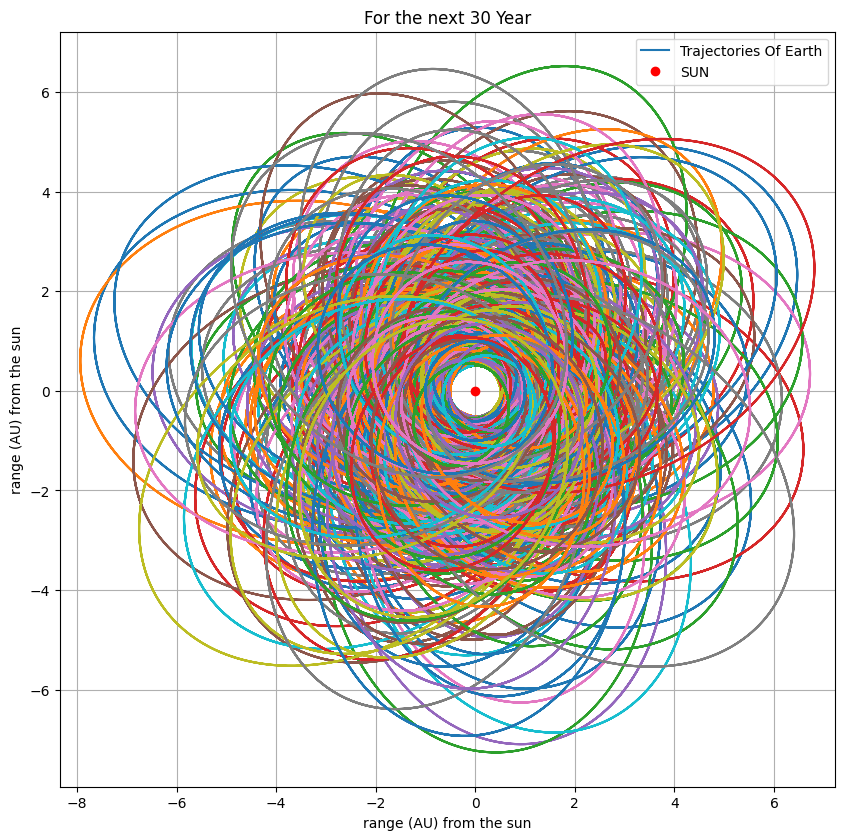

In [53]:
t = np.arange(0,365*30) #n년(일)

for i in range(1000): #천 개의 천체
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic

  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분

  plt.figure(num=1,figsize=(10,10), dpi=100)
  plt.plot(state[:,0]*np.cos(state[:,2]) , state[:,0]*np.sin(state[:,2])) #x = rcos(theta), y =rsin(theta)

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 
plt.figure(num=1,figsize=(10,10), dpi=100)
plt.plot(state_e[:,0]*np.cos(state_e[:,2]) , state_e[:,0]*np.sin(state_e[:,2]), label=f'Trajectories Of Earth')

plt.figure(num=1, figsize=(10,10), dpi=100) #한꺼번에 묶기
plt.plot(0,'ro', label = "SUN") #중심부에 태양 표시
plt.xlabel(r'range (AU) from the sun')
plt.ylabel(r'range (AU) from the sun')
plt.axis('equal')
plt.title("For the next 30 Year")
plt.legend()
plt.grid()



In [54]:
t = np.arange(0,365*30) #n년(일)

min_dis_neo = np.ones((2,1000))*10 #NEO의 최소거리&날짜 저장. 1행엔 날짜, 2행엔 거리 저장
distance_min = 10 #대소 비교용 초기값

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 

for i in range(1000): #1000개의 행성
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic
 
  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분
  distance_min = 10 #매 실행마다 초기화될 수 있도록.
  for j in range(len(t)) :
    distance_temp = [(state_e[j,0]*np.cos(state_e[j,2]) - state[j,0]*np.cos(state[j,2])),(state_e[j,0]*np.cos(state_e[j,2]) - state[j,0]*np.cos(state[j,2]))] #norm하기 전 저장
    distance_size = np.linalg.norm(distance_temp) #distance_size
    if distance_min > distance_size : # 각 NEO 별 최소값을 저장하기 위함.
      min_dis_neo[0,i] = j
      min_dis_neo[1,i] = distance_size
      distance_min = distance_size

low_5 = []
low_5_index = []

for k in range(5): #최솟값 추출
  min_index = np.argmin(min_dis_neo[1,])
  low_5_index.append(min_index)
  low_5.append(min_dis_neo[1,min_index])
  min_dis_neo[1,min_index] = 10

print(low_5) #지구와의 거리 작은 순서부터 나열
print(low_5_index) #해당 NEOs의 index


[3.622960893776078e-07, 3.807711954138156e-07, 7.638781013485824e-07, 9.539484492187426e-07, 1.0974835718718556e-06]
[884, 796, 145, 228, 379]


In [55]:
print("날짜 인덱스 : ",min_dis_neo[0,low_5_index[0]] , min_dis_neo[0,low_5_index[1]] , min_dis_neo[0,low_5_index[2]] , min_dis_neo[0,low_5_index[3]], min_dis_neo[0,low_5_index[4]])

날짜 인덱스 :  1839.0 6599.0 1257.0 1048.0 6415.0


결과에 따르면 885, 797, 146, 229, 380번 째 NEO 순으로 지구와의 순간 거리가 가까움을 알 수 있다. 지구와의 거리는 각각
3.622960893776078e-07, 3.807711954138156e-07, 7.638781013485824e-07, 9.539484492187426e-07, 1.0974835718718556e-06AU이다.
또한 각각 지구랑 가장 가까울 때는 2020년 11월 10일 기준 1840, 6600, 1258, 1049, 6416일 후임을 알 수 있다.


<br>

_**(Problem 2c)**_ Plot of the trajectories of the five most hazardous objects (for the next 30 years) and the Earth, marking the potential collision spots (of the five closest approaches). 

What would the weather on the doomsday be like? Your guess should be entirely reasonable based on your simulation results.


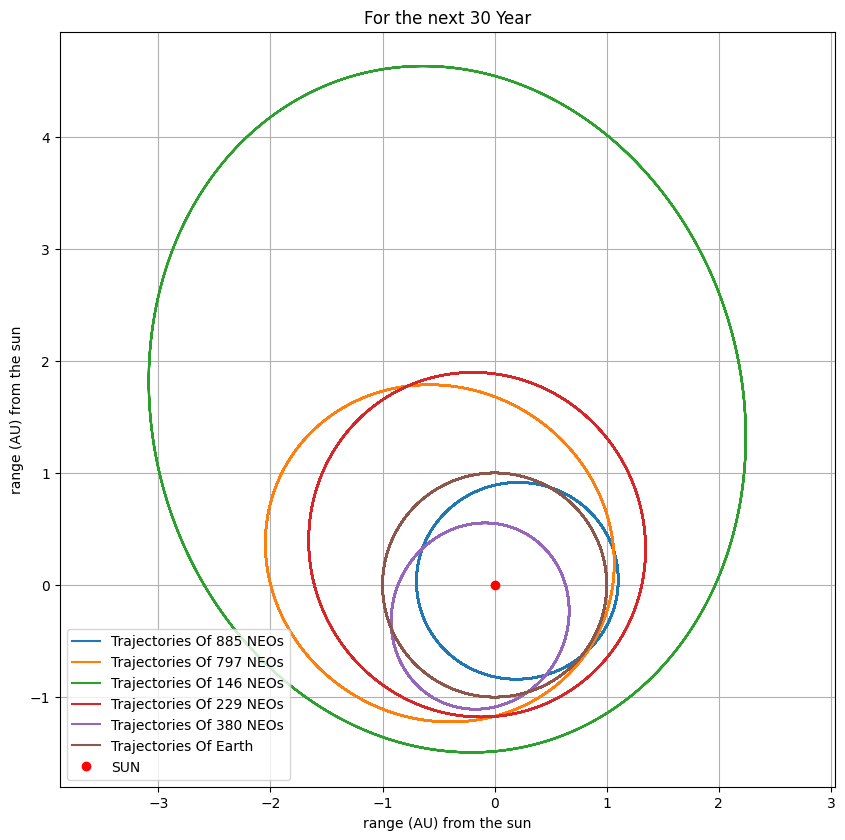

In [56]:
t = np.arange(0,365*30) #n년(일)


for i in low_5_index : #가장 가까운 천체 그래프 그리기
  ic = [NEO_current_states["Range (AU)"][i],NEO_current_states["Range rate (AU/day)"][i],NEO_current_states["Angle (rad)"][i],NEO_current_states["Angular rate (rad/day)"][i]] #각 천체 ic

  state = spi.odeint(model,ic,t) #model , ic, t 이용 적분

  plt.figure(num=1,figsize=(10,10), dpi=100)
  plt.plot(state[:,0]*np.cos(state[:,2]) , state[:,0]*np.sin(state[:,2]), label=f'Trajectories Of {i+1} NEOs') #x = rcos(theta), y =rsin(theta)

ic_e = [1,0,0,mu**0.5] #지구 초기조건
state_e = spi.odeint(model,ic_e,t) 
plt.figure(num=1,figsize=(10,10), dpi=100) #그래프 설정
plt.plot(state_e[:,0]*np.cos(state_e[:,2]) , state_e[:,0]*np.sin(state_e[:,2]), label=f'Trajectories Of Earth')

plt.figure(num=1, figsize=(10,10), dpi=100) #한꺼번에 묶기
plt.plot(0,'ro', label = "SUN") #중심부에 태양 표시
plt.xlabel(r'range (AU) from the sun')
plt.ylabel(r'range (AU) from the sun')
plt.axis('equal')
plt.title("For the next 30 Year")
plt.legend()
plt.grid()


885, 797, 146, 229, 380번 째 NEO는 각각 2020년 11월 10일 기준 1840, 6600, 1258, 1049, 6416일 후에 만나게 되는데 1840, 6600, 1258, 1049, 6416일은 
각각 5년 15일, 18년 30일, 3년 163일 2년 319일 , 17년 211일 후 임을 의미한다.

따라서 각 계절은 다음과 같을 것이다.

NEO 885 : 겨울

 NEO 797 : 겨울

NEO 146 : 봄 

NEO 229 : 가을

NEO 380 : 봄
